In [19]:
# for some basic operations
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [20]:
import pandas as pd

# Load dataset into dataframe
df = pd.read_csv('fruits.csv')
df = df.rename(columns={'43.7': 'DIAMETRE', '38.57': 'POIDS'})
df



,DIAMETRE,POIDS
0,22.47,6.41
1,26.09,8.72
2,36.18,27.45
3,18.24,1.89
4,43.80,43.59
...,...,...
394,41.16,41.34
395,58.76,94.25
396,26.91,9.60
397,20.36,5.50


In [21]:
df.describe()

,DIAMETRE,POIDS
count,399.000000,399.000000
mean,35.147293,32.675138
std,12.765921,31.120800
min,17.030000,1.090000
25%,24.110000,7.160000
50%,28.930000,11.430000
75%,46.555000,53.250000
max,58.920000,109.910000


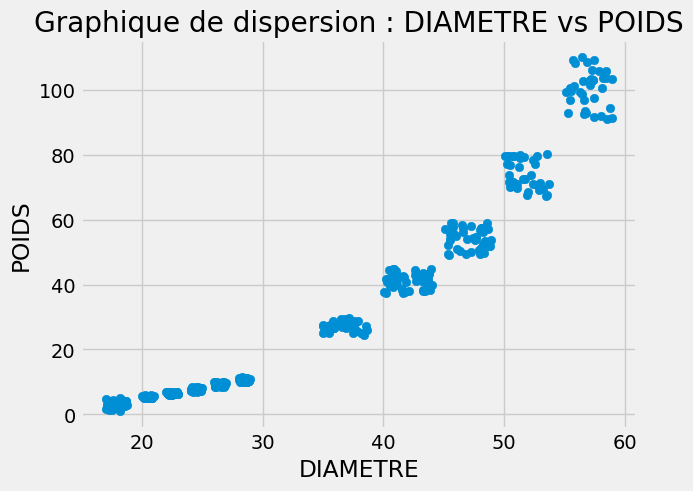

In [22]:
plt.scatter(df["DIAMETRE"], df["POIDS"])
plt.xlabel("DIAMETRE")
plt.ylabel("POIDS")
plt.title("Graphique de dispersion : DIAMETRE vs POIDS")
plt.show()

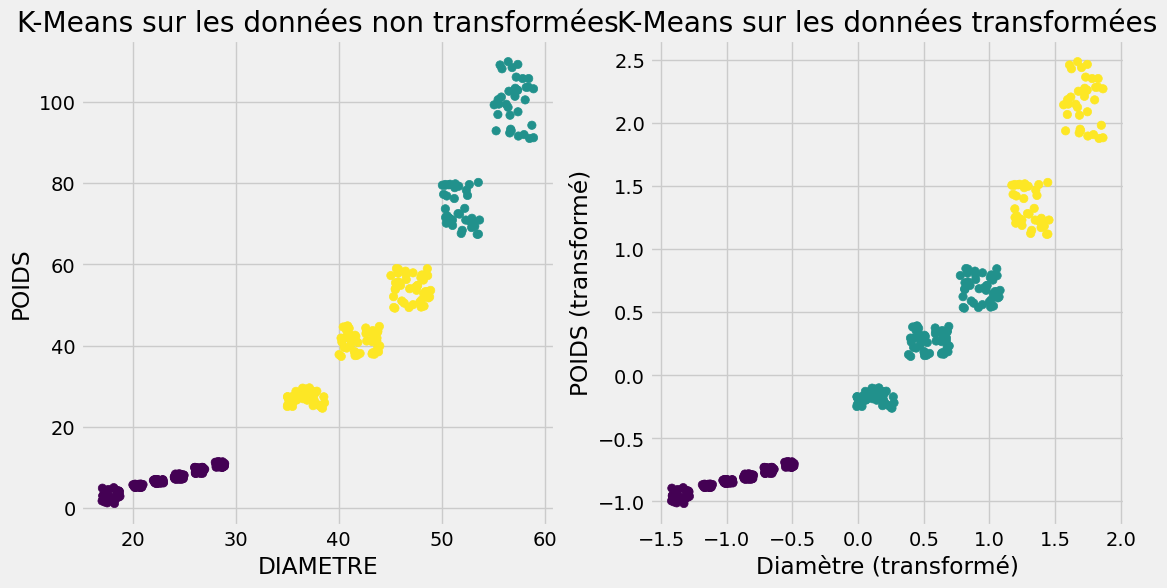

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choisir le nombre de clusters
n_clusters = 3

# Appliquer K-Means sur les données non transformées
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster_non_transforme'] = kmeans.fit_predict(df)

# Transformer les données avec StandardScaler
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Appliquer K-Means sur les données transformées
kmeans_transformed = KMeans(n_clusters=n_clusters, random_state=42)
df_transformed['cluster_transforme'] = kmeans_transformed.fit_predict(df_transformed)

# Visualiser les résultats
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(df["DIAMETRE"], df["POIDS"], c=df['cluster_non_transforme'], cmap='viridis')
axes[0].set_xlabel("DIAMETRE")
axes[0].set_ylabel("POIDS")
axes[0].set_title("K-Means sur les données non transformées")

axes[1].scatter(df_transformed["DIAMETRE"], df_transformed["POIDS"], c=df_transformed['cluster_transforme'], cmap='viridis')
axes[1].set_xlabel("Diamètre (transformé)")
axes[1].set_ylabel("POIDS (transformé)")
axes[1].set_title("K-Means sur les données transformées")

plt.show()


c:\Users\SurfaceBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\SurfaceBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


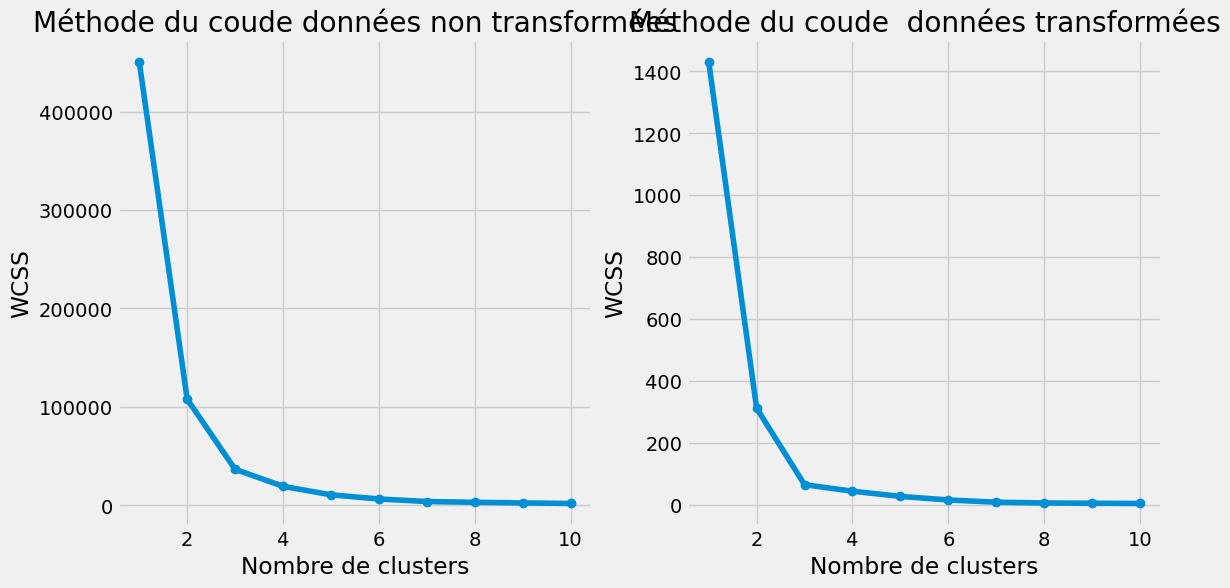

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fonction pour calculer la somme des distances au carré pour un certain nombre de clusters
def calculate_wcss(data, max_clusters):
    wcss = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculer la somme des distances au carré pour les deux modèles
max_clusters = 10
wcss_non_transformed = calculate_wcss(df, max_clusters)
wcss_transformed = calculate_wcss(df_transformed, max_clusters)

# Visualiser les résultats avec la méthode du coude
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(range(1, max_clusters + 1), wcss_non_transformed, marker='o')
axes[0].set_xlabel("Nombre de clusters")
axes[0].set_ylabel("WCSS")
axes[0].set_title("Méthode du coude données non transformées")

axes[1].plot(range(1, max_clusters + 1), wcss_transformed, marker='o')
axes[1].set_xlabel("Nombre de clusters")
axes[1].set_ylabel("WCSS")
axes[1].set_title("Méthode du coude  données transformées")

plt.show()


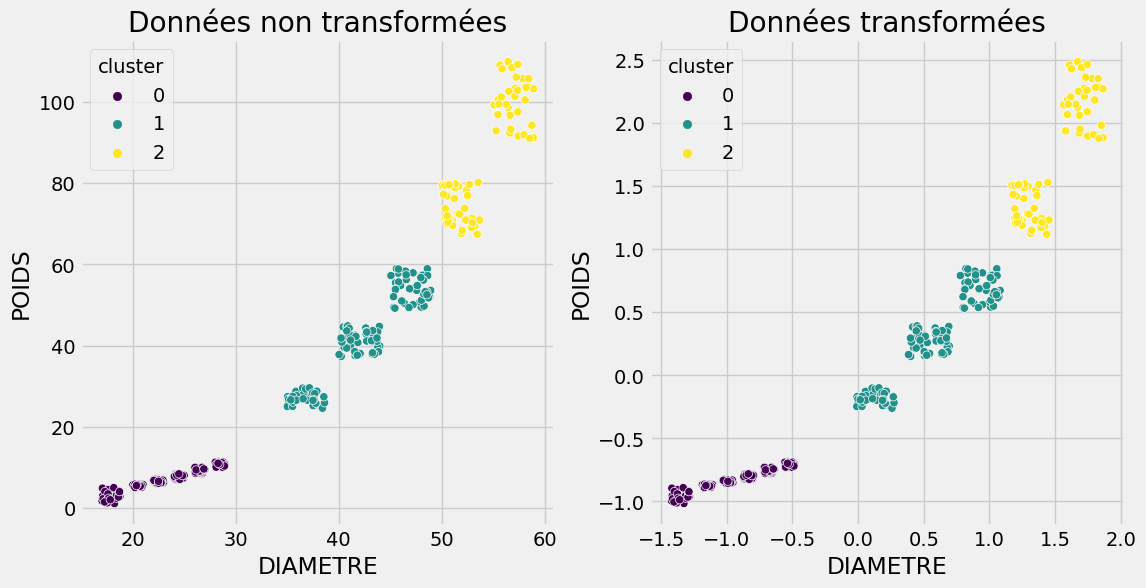

In [35]:

# Choisir le nombre de clusters
n_clusters = 3

# Appliquer KMeans aux données transformées
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_transformed)

# Ajouter la colonne de classe d'appartenance aux DataFrames
df["cluster"] = kmeans.labels_
df_transformed["cluster"] = kmeans.labels_

# Visualiser les données avec la nouvelle colonne de classe d'appartenance
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=df, x="DIAMETRE", y="POIDS", hue="cluster", palette="viridis", ax=axes[0])
axes[0].set_title("Données non transformées")

sns.scatterplot(data=df_transformed, x="DIAMETRE", y="POIDS", hue="cluster", palette="viridis", ax=axes[1])
axes[1].set_title("Données transformées")

plt.show()

In [36]:


# Calculer les statistiques descriptives pour chaque cluster
cluster_stats = df.groupby("cluster").agg({"DIAMETRE": ["mean", "std", "count"], "POIDS": ["mean", "std", "count"]})

# Afficher les statistiques descriptives pour chaque cluster
print(cluster_stats)


          DIAMETRE                      POIDS                 
              mean       std count       mean        std count
cluster                                                       
0        23.683500  3.457963   200   7.277650   2.489034   200
1        42.167280  4.350570   125  41.338160  11.050851   125
2        54.272432  2.924206    74  86.683514  14.262872    74


In [37]:
from sklearn.metrics import silhouette_score

# Calculer l'indice de silhouette pour les données non transformées et transformées
silhouette_non_transformed = silhouette_score(df.iloc[:, :-1], df['cluster'])
silhouette_transformed = silhouette_score(df_transformed.iloc[:, :-1], df_transformed['cluster'])

print(" K-Means sur données non transformées:", silhouette_non_transformed)
print(" K-Means sur données transformées:", silhouette_transformed)


 K-Means sur données non transformées: 0.7200259342773828
 K-Means sur données transformées: 0.8201125145943002


In [41]:
def predict_class(model, scaler, instance):
    instance_transformed = scaler.transform([instance])  # Transformer l'instance avec le scaler ajusté
    predicted_class = model.predict(instance_transformed)  # Prédire la classe
    return predicted_class[0]

# Instances à classer
instance1 = [26.98, 8.75]  # Indice : cerise
instance2 = [55.7, 102.16]  # Indice : abricot

# Prédire les classes pour les instances
predicted_class1 = predict_class(kmeans_transformed, scaler, instance1)
predicted_class2 = predict_class(kmeans_transformed, scaler, instance2)


print(f"Classe prédite pour l'instance {instance1} (cerise) : {predicted_class1}")
print(f"Classe prédite pour l'instance {instance2} (abricot) : {predicted_class2}")




c:\Users\SurfaceBook\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but StandardScaler is expecting 3 features as input.

# Modèle de ML

Répartition de survived (**pop générale**) 

# Construction de l'arbre 